In [2]:
# general purpose data manipulation and analysis
import numpy as np

# packages for working with raster datasets
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.enums import Resampling

import xarray # allows us to work with raster data as arrays


# packages for working with geospatial data
import geopandas as gpd
import pycrs

from shapely.geometry import box
import rioxarray

# import packages for viewing the data
import matplotlib.pyplot as pyplot

In [4]:
# matplotlib functionality
%matplotlib inline
# %matplotlib notebook

In [3]:
# open the raster
fparts_SD_GM_3m = "Data/Data/ASO_3M_SD_USCATB_20130525.tif"

SD_GM_3m = rasterio.open(fparts_SD_GM_3m)

In [6]:
# check the CRS - is it consistent with other datasets we want to use?
SD_GM_3m.crs

CRS.from_epsg(32611)

In [9]:
SD_GM_3m.res

(3.0, 3.0)

In [10]:
SD_GM_3m.bounds

BoundingBox(left=254247.0, bottom=4179327.0, right=307344.0, top=4229667.0)

In [11]:
print(SD_GM_3m.width,SD_GM_3m.height)

17699 16780


<Axes: >

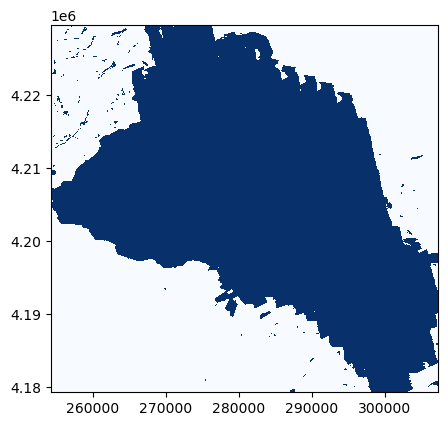

In [12]:
fig1, ax1 = pyplot.subplots(1, figsize=(5, 5))
show((SD_GM_3m, 1), cmap='Blues', interpolation='none', ax=ax1)

In [7]:
# First, close the rasterio file
SD_GM_3m.close()

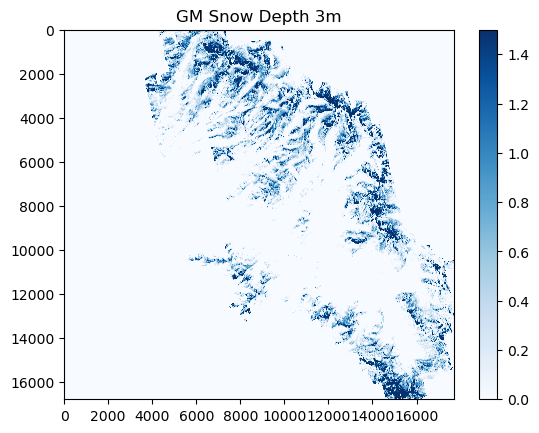

In [8]:
dat_array_3m = rioxarray.open_rasterio(fparts_SD_GM_3m)

# plot the raster 

fig2, ax2 = pyplot.subplots()
pos2 = ax2.imshow(dat_array_3m.data[0,:,:], cmap='Blues', vmin=0, vmax=1.5);
ax2.set_title('GM Snow Depth 3m')
fig2.colorbar(pos2, ax=ax2)

In [23]:
np.nanmax(dat_array_3m)

24.935667

In [24]:
!gdalinfo $fparts_SD_GM_3m

Driver: GTiff/GeoTIFF
Files: Data/Data/ASO_3M_SD_USCATB_20130525.tif
Size is 17699, 16780
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 11N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 11N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-117,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID

In [26]:
SD_GM_3m.nodata

-9999.0

In [5]:
a = SD_GM_3m.read(1)

In [6]:
a = np.ma.masked_equal(a, -9999.0)

In [1]:
# f,ax = pyplot.subplots()
# m = ax.imshow(a, cmap='Blues', vmin=0, vmax=1.5)
# plt.colorbar(m, ax=ax);

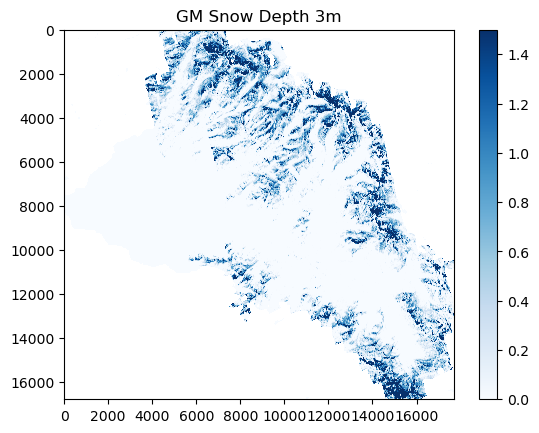

In [7]:
fig2, ax2 = pyplot.subplots()
pos2 = ax2.imshow(a, cmap='Blues', vmin=0, vmax=1.5);
ax2.set_title('Tuolumne Snow Depth 3m')
fig2.colorbar(pos2, ax=ax2)